# <u>Projet 3: Concevez une application au service de la santé publique (Notebook du nettoyage)</u>

### <u>Sommaire</u>

- <a href ="#0"> Introduction </a>
- 1. <a href ="#1"> présenter et choisir les données </a>
- 2. <a href ="#2"> Nettoyer les données </a><br/>
    - 2.1. <a href ="#21"> Choisir les variables pertinentes </a><br/>
    - 2.2. <a href ="#22"> Traiter les valeurs aberrantes </a><br/>
    - 2.3. <a href ="#23"> Remplir les valeurs manquantes </a><br/>


## <a name = "0">Introduction</a>

<div style="text-align: justify">
Ce projet est le troisième projet d'OpenClassroom pour la formation Data Scientist. L'objectif du projet est de créer une application à partir d'une idée innovante en lien avec l'alimentation. J'ai décidé de créer une application qui va aider les sportifs dans leurs choix d'alimentation. Cette application se concentre sur le pourcentage de protéine et en même temps donne une idée générale sur le produit choisi. Donc, l'utilisateur va scanner le bar-code du produit et il obtient le pourcentage du protéine sur un camembert qui donnera aussi des pourcentages des autres ingrédients et le nutri-score au centre du Camembert.<br>

<b><i><u> Remarque </u></i></b><br>
Si vous souhaitez exécuter les codes, vérifiez avant de commencer de mettre dans le même  répertoire le fichier <i> fr.openfoodfacts.org.products.csv </i>

</div>

## <a name = "1">présenter et choisir les données</a>

<div style="text-align: justify">
Comme tout début du projet. La première étape est de découvrir les données, choisir les plus pertinentes, et les préparer dans un DataFrame pour commencer le nettoyage.
</div>

In [2]:
import numpy as np
import pandas as pd
import missingno
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
df = pd.read_csv('./fr.openfoodfacts.org.products.csv', sep="\t",low_memory=False)

In [4]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [59]:
list(df.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype

In [60]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [62]:
df.shape


(320772, 162)

In [63]:
df.isna().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [64]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [65]:
len(df)

320772

<div style="text-align: justify">
Afin de simplifier le choix des colonnes, j'ai créé la fonction <b><i> suprrimer_des_colonnes </i></b> pour supprimer les colonnes qui ont un grand nombre de valeurs manquantes. On peut choisir ce nombre à l'aide de la variable <b><i> Nombre_de_données </i></b>. Et j'ai choisi le nombre 10^5 qui est environ le tiers du nombre total des données d'une colonne.

</div>

In [66]:
def suprrimer_des_colonnes(df, Nombre_de_données):
    
    for x in df.columns:
        if df[x].notna().sum()<Nombre_de_données:
            df.drop(columns=[x],inplace=True)
            
    return df

In [90]:
df=suprrimer_des_colonnes(df,10**5)

<div style="text-align: justify">
Présenter le résultat de la fonction <b><i> suprrimer_des_colonnes </i></b> sur une figure à l'aide de <b><i> missingno.bar </i></b> pour vérifier et comprendre le taux de remplissage des données:
</div>

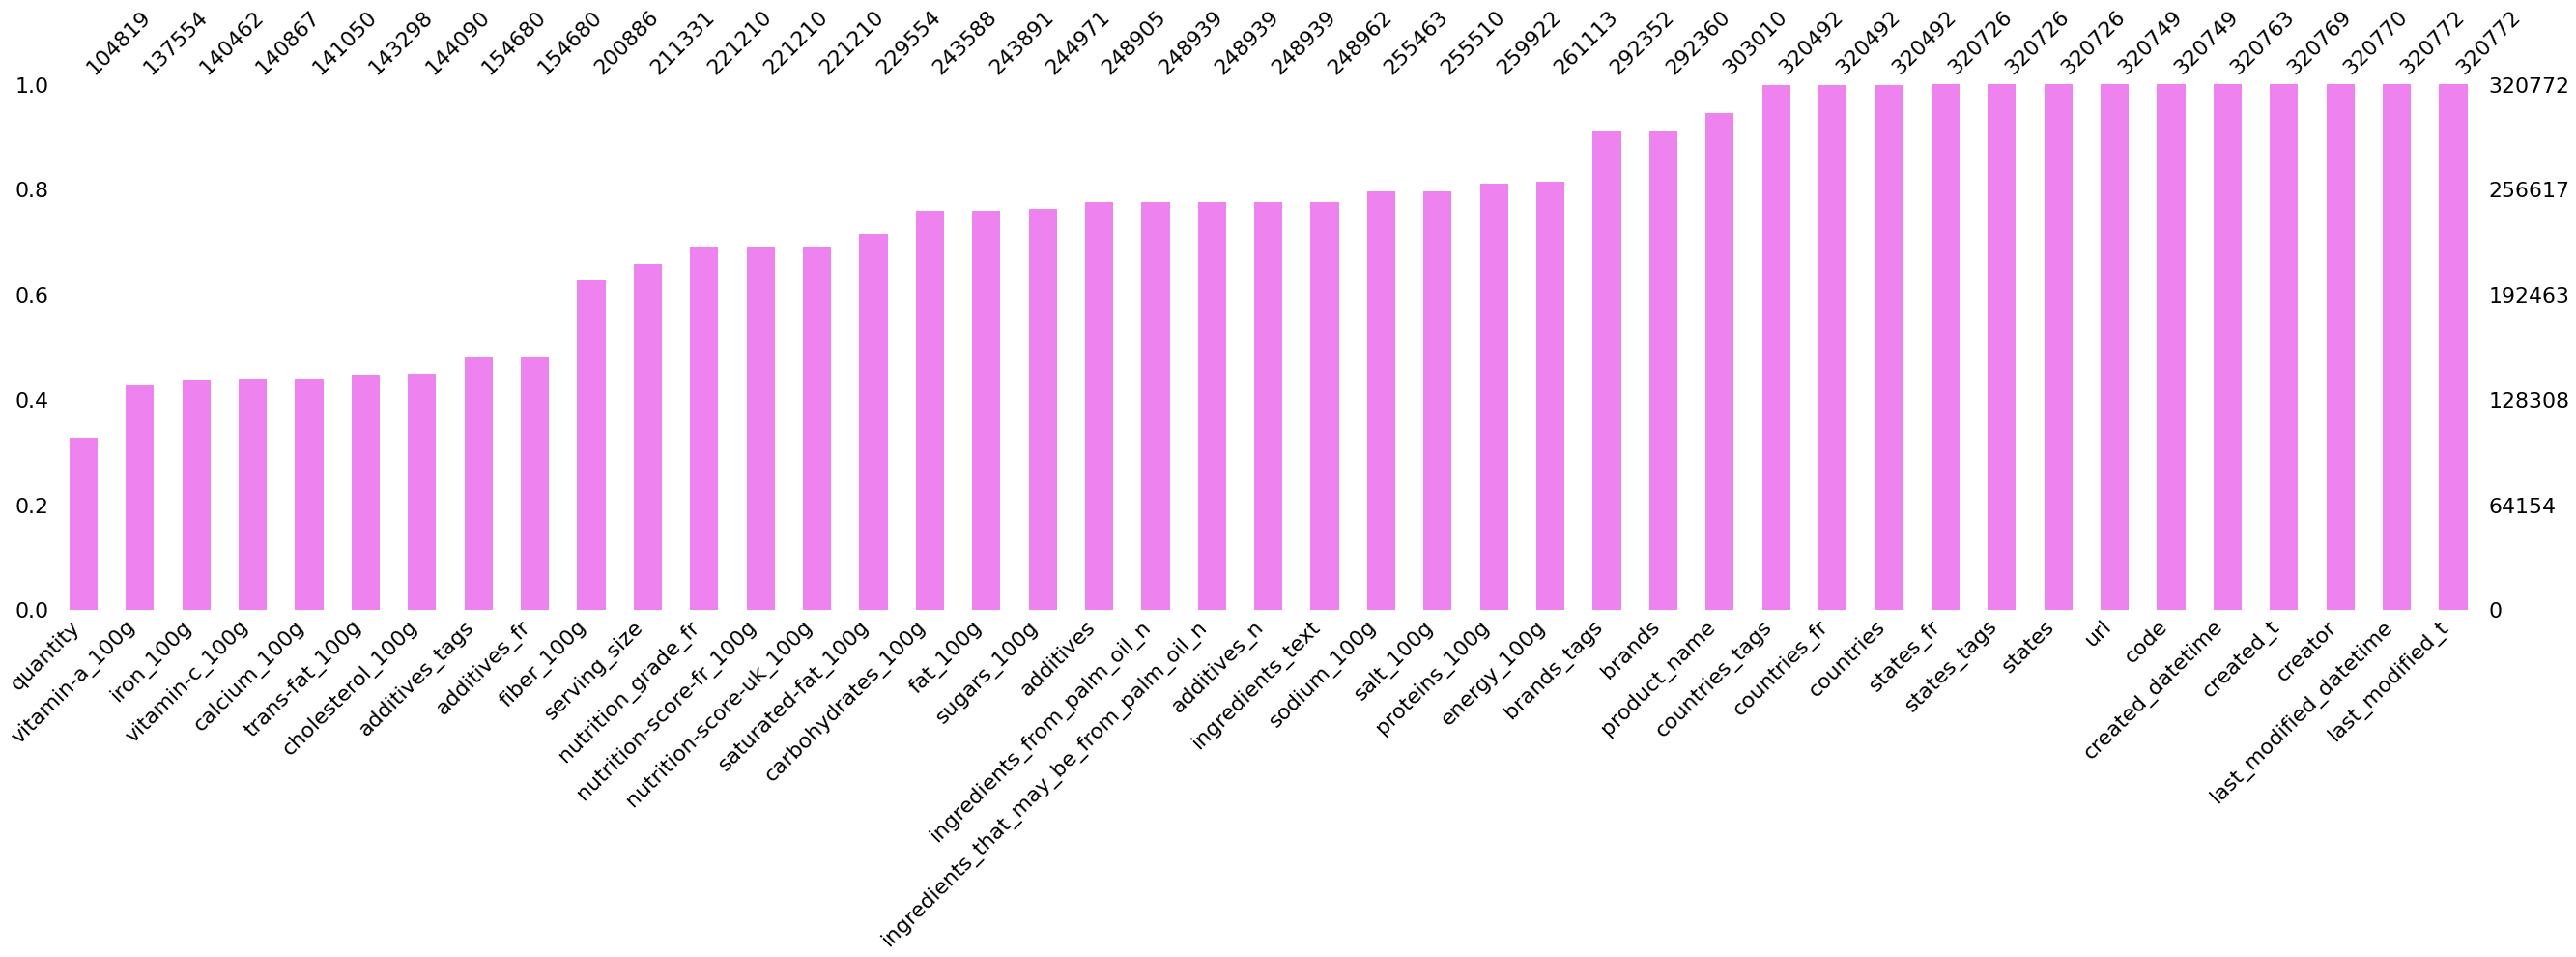

In [68]:
missingno.bar(df, color="violet", sort="ascending", figsize=(45,10), fontsize=22);

In [69]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

<div style="text-align: justify">
Choisir les colonnes les plus pertinentes pour mon application:
</div>

In [70]:
ChosenColumns=['code','url','product_name','quantity','ingredients_text','nutrition_grade_fr','energy_100g',
                'fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g',
                'fiber_100g','proteins_100g','salt_100g']

<div style="text-align: justify">
Le choix des colonnes ('code','url','product_name','quantity','ingredients_text') est indispensable pour avoir des informations essentielles sur le produit, ce choix peut être considéré comme l'identifiant du produit et qu'est ce qu'il contient. Ensuite, sûrement il faut choisir la colonne de 'proteins_100g' parce que c'est la base pour mon idée d'application. Il faut aussi choisir la colonne 'nutrition_grade_fr' pour connaître la qualité du produit selon l'échelle de Nutri-Score. La colonne 'carbohydrates_100g' est aussi importante parce que pour quelqu'un sportif, il s'intéresse au carbohydrates aussi. La colonne ''saturated-fat_100g' peut être utile comme une information supplémentaire et considérée aussi importante pour la santé du corps. 
    Les colonnes qui restent ('energy_100g','fat_100g','transfat_100g','cholesterol_100g','sugars_100g','fiber_100g','salt_100g') sont pour donner des informations alimentaires supplémentaires sur le produit.   
</div>

<div style="text-align: justify">
La ligne suivante permet de voir les données non manquantes de chaque colonne:
</div>

In [71]:
x='product_name'
df[x].loc[df[x].notna()]

0                                        Farine de blé noir
1                            Banana Chips Sweetened (Whole)
2                                                   Peanuts
3                                    Organic Salted Nut Mix
4                                           Organic Polenta
                                ...                        
320767                                    Tomato & ricotta 
320768    Mint Melange Tea A Blend Of Peppermint, Lemon ...
320769                                              乐吧泡菜味薯片
320770                             Tomates aux Vermicelles 
320771                      Sugar Free Drink Mix, Peach Tea
Name: product_name, Length: 303010, dtype: object

In [72]:
df[x][4]

'Organic Polenta'

In [73]:
len(df[x].unique())

221348

<div style="text-align: justify">
Créer le DataFrame avec les colonnes choisies:
</div>

In [91]:
df=df[ChosenColumns]
df

,code,url,product_name,quantity,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",d,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,Peanuts,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,NaN,"Organic hazelnuts, organic cashews, organic wa...",d,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,Organic Polenta,NaN,Organic polenta,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,Tomato & ricotta,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,"Organic peppermint, organic lemon grass, organ...",b,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,乐吧泡菜味薯片,50 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,Tomates aux Vermicelles,67g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <a name = "2">Nettoyer les données</a>

<div style="text-align: justify">
Cette étape est primordiale avant de commnener tout projet. Donc, il faut préparer les données, supprimer les colonnes qui ont un faible pourcentage du taux du remplissage, garder les plus pertinentes, vérifier qu'ils n'ont pas des valeurs aberrantes (Des valeurs qui sortent de l'échelle), et remplir les valeurs manquantes à la fin.
</div>

### <a name = "21">Choisir les variables pertinentes</a>

<div style="text-align: justify">
Pour vérifier les taux du remplissage, j'ai créé la fonction <b><i> taux_de_remplissage </i></b> qui présente les taux avec des barres sur une figure:

</div>

In [75]:
def taux_de_remplissage(df):
    
    Percentage=[]
    
    for x in df.columns:
        Percentage.append(int(100*df[x].notna().sum()/len(df)))
    
    dford=pd.DataFrame(columns=['Column name','Fill rate'])
    dford['Column name']=df.columns
    dford['Fill rate']=Percentage
    dford=dford.sort_values(by=['Fill rate'],ascending=False).reset_index()
    
    
    fig=plt.figure(figsize=(12, 10))
    ax = plt.axes()
    ax.set_facecolor('lavender') 
    fig=plt.rcParams['font.size'] = '12'
    bars=plt.barh(dford['Column name'],dford['Fill rate'],height=0.2,color=['olive'])
    fig=plt.xlabel("Taux de remplissage %")
    fig=plt.ylabel("Colonnes")
    
    i=0
    for g in bars:
        width = g.get_width()
        height = g.get_height()
        x, y = g.get_xy()
        fig=plt.text(x+width*1.001, y+height/2,str(dford['Fill rate'][i])+'%')
        i+=1

    return fig

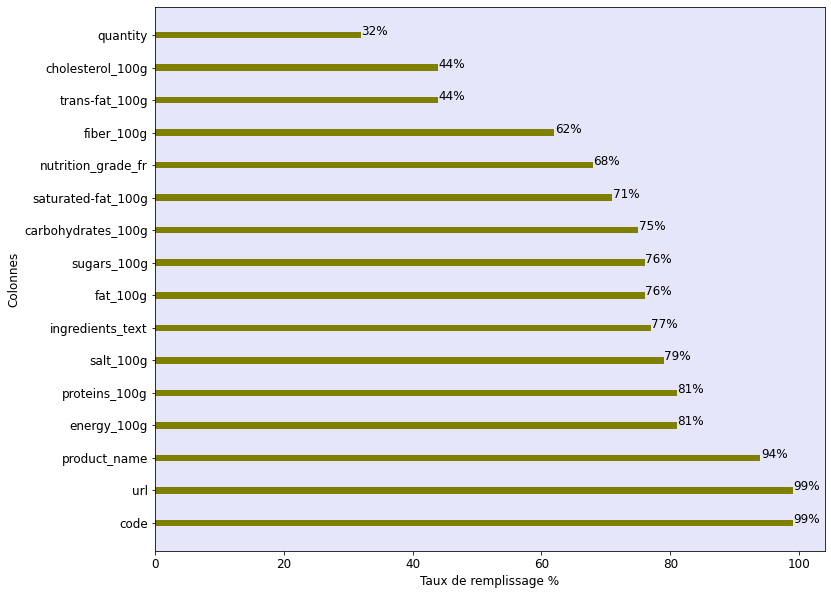

In [76]:
taux_de_remplissage(df);

<div style="text-align: justify">
Supprimer les colonnes avec un faible taux de remplissage:
</div>

In [92]:
df.drop(['quantity','cholesterol_100g','trans-fat_100g','fiber_100g'], axis=1, inplace=True)

In [78]:
df

,code,url,product_name,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",d,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",d,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,Organic Polenta,Organic polenta,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"Mint Melange Tea A Blend Of Peppermint, Lemon ...","Organic peppermint, organic lemon grass, organ...",b,0.0,0.00,0.00,0.00,0.00,0.00,0.00000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <a name = "22">Traiter les valeurs aberrantes</a>

<div style="text-align: justify">
Les colonnes numérique qui se terminent avec '100g' doivent avoir les valoir entre 0 et  100. Donc, j'ai créé la fonction <b><i> VarAberr0100 </i></b> qui vérifie que les valeurs sont entre 0 et 100. Si les valeurs ne sont pas dans cette échelle, elles seront remplacées par nan (des valeurs manquantes).

</div>


In [79]:
def VarAberr0100(df):
    
    dfCopy=df.copy()
    
    for X in dfCopy.columns:
        if '100g' in X:
            dfCopy[X]=dfCopy[X].apply(lambda x1: np.nan if (x1<0 or x1>100) else x1)
            
    return(dfCopy)

<div style="text-align: justify">
Appliquer la fonction <b><i> VarAberr0100 </i></b> et revérifier le taux de remplissage:
</div>

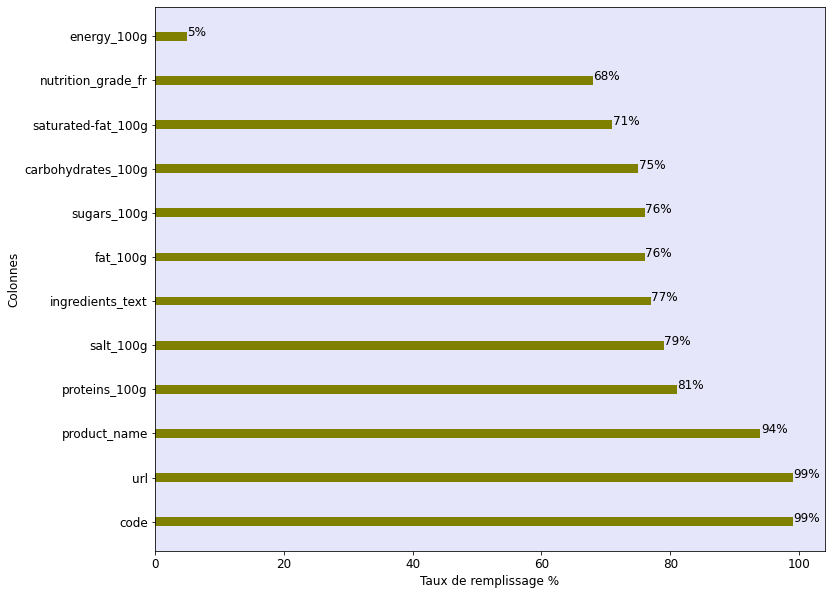

In [80]:
df=VarAberr0100(df)
taux_de_remplissage(df);

<div style="text-align: justify">
Supprimer les colonnes avec un faible taux de remplissage:
</div>

In [81]:
df.drop(['energy_100g'], axis=1, inplace=True)

In [82]:
df

,code,url,product_name,ingredients_text,nutrition_grade_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",d,28.57,28.57,64.29,14.29,3.57,0.00000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,17.86,0.00,60.71,17.86,17.86,0.63500
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",d,57.14,5.36,17.86,3.57,17.86,1.22428
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,Organic Polenta,Organic polenta,NaN,1.43,NaN,77.14,NaN,8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"Mint Melange Tea A Blend Of Peppermint, Lemon ...","Organic peppermint, organic lemon grass, organ...",b,0.00,0.00,0.00,0.00,0.00,0.00000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <a name = "23">Remplir les valeurs manquantes</a>

<div style="text-align: justify">
J'ai créé la fonction <b><i> remplir </i></b> qui va remplir tout le DataFrame. Pour les colonnes (code, url), on va supprimer les valeurs manquantes par ligne. Pour la colonne (product_name), on va remplir par la valeur la plus répétitive avec fillna(). Pour les colonnes de 100g, on va les remplir par moyenne. Pour la colonne catégorielle (nutrition_grade_fr), on va remplir par la méthode de KNN. 

</div>

In [83]:
df.isnull().sum()

code                     23
url                      23
product_name          17762
ingredients_text      71810
nutrition_grade_fr    99562
fat_100g              76885
saturated-fat_100g    91221
carbohydrates_100g    77203
sugars_100g           75820
proteins_100g         60854
salt_100g             65420
dtype: int64

In [84]:
def remplir(df):

    dfCopy=df.copy()
    
# Supprimmer les linges pour les colonnes code et url (Il suffit de voir l'index de la colonne code...
# ...Car si on n'a pas le code, c'est à dire qu'on n'a pas le url)
    NanCode=dfCopy['code'].loc[dfCopy['code'].isna()]
    Indexdrop=NanCode.index
    for X in Indexdrop:
        dfCopy.drop(X,inplace=True)
        
        
# Remplir les colonnes qui continnent du texte sauf la colonne catégorielle 'nutrition_grade_fr'... 
# ...et les colonnes de 100g par moyenne
    IndexToFillbyMean=[]
    Mean=[]
    for X in dfCopy.columns:
        if '100g' in X:
            dfCopy.dropna(subset=[X,'product_name'],thresh=2,inplace=True)# Si on supprime les deux valeurs manquantes,...
            #... On obtient un résultat plus précis. Et le résultat du remplissage sera basé... 
            #...sur des valeurs non déjà remplies
            dfm=pd.DataFrame({'product_name':dfCopy['product_name'],X:dfCopy[X]})
            IndexToFillbyMean.append(dfm.loc[dfm[X].isna()].index)
            dfm.dropna(inplace=True)
            Mean.append(dfm.groupby(by=['product_name']).mean())

    
    for X in dfCopy.columns:
        if '100g' in X or X in ['code','url'] or X=='nutrition_grade_fr':
            pass
        else: 
            dfCopy[X]=dfCopy[X].str.replace('.','',regex=True)
            MostFrequently=dfCopy[X].value_counts().index[0] #prendre la valeur la plus répétitive
            dfCopy[X]=dfCopy[X].fillna(MostFrequently)

            
    for X in range(len(Mean)):   
        for Xi in IndexToFillbyMean[X]:
            dfCopy.loc[Xi,list(Mean[X].columns)[0]]=Mean[X].loc[dfCopy['product_name'][Xi],list(Mean[X].columns)[0]]
    
    
# Remplir la colonne catégorielle 'nutrition_grade_fr' :
## Adapter le nombre de components X et Y
    dfXY=pd.DataFrame(columns=['X','Y'])
    dfXY['X']=dfCopy['proteins_100g']
    dfXY['Y']=dfCopy['nutrition_grade_fr']
    X=list(dfXY.dropna()['X'].apply(lambda x: [x]))
    Y=dfXY.dropna()['Y'] 

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, Y);

## Trouver x et son index pour prévoir y
    IndexToPredict=dfXY['Y'].loc[dfXY['Y'].isna()].index
    XToPredict=list(dfXY['X'].loc[dfXY['Y'].isna()].apply(lambda x: [x]))
    YPredicted=pd.DataFrame({'nutrition_grade_fr':neigh.predict(XToPredict)}).set_index(IndexToPredict)

## Remplir les valeurs prévues avec Knn dans df 
    for x in IndexToPredict:
        dfCopy.loc[x,'nutrition_grade_fr']=YPredicted['nutrition_grade_fr'][x]

    return dfCopy

In [85]:
dfr=remplir(df)
dfr.isnull().sum()

code                  0
url                   0
product_name          0
ingredients_text      0
nutrition_grade_fr    0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
proteins_100g         0
salt_100g             0
dtype: int64

In [86]:
dfr

,code,url,product_name,ingredients_text,nutrition_grade_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",d,28.57,28.57,64.29,14.29,3.57,0.00000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",b,17.86,0.00,60.71,17.86,17.86,0.63500
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",d,57.14,5.36,17.86,3.57,17.86,1.22428
7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",c,18.75,4.69,57.81,15.62,14.06,0.13970
12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,Zen Party Mix,"Roasted peanuts (peanuts, peanut or canola oil...",d,36.67,5.00,36.67,3.33,16.67,1.60782
...,...,...,...,...,...,...,...,...,...,...,...
320738,9780803738782,http://world-fr.openfoodfacts.org/produit/9780...,Organic Z Bar,"Organic oat blend (organic rolled oats, organi...",d,9.72,2.78,61.11,30.56,5.56,0.95250
320742,9787461062105,http://world-fr.openfoodfacts.org/produit/9787...,Natural Cassava,Cassava,a,0.00,0.00,87.06,2.35,1.18,0.03048
320751,9847548283004,http://world-fr.openfoodfacts.org/produit/9847...,Tartines craquantes bio au sarrasin,Almonds,a,2.80,0.60,74.80,2.60,13.00,0.68000
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,0.20,0.20,0.50,0.50,0.50,0.02540


<div style="text-align: justify">
Exporter le DataFrame final pour l'utiliser pour le NoteBook d'exploration. Ce projet est réalisé sur deux NoteBook:<br>
    
<ul>
<li>  1. NoteBook du nettoyage</li>
<li>2. NoteBook d'exploration.</li>
</ul>
    
</div>

In [87]:
dfr.to_csv('DataFrame_Final_Nettoyes.csv',index=False)